# Business Data Science 5

Joseph Chin and Wilshire Liu

In [1]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import glm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns

%matplotlib inline

## Problem 1

In [2]:
nyc = pd.read_csv('NYC_stop_and_frisk.dat', skiprows=6, delimiter=" ")
nyc.rename(columns={"past.arrests" : "past_arrests"}, inplace=True)
nyc.head()

,stops,pop,past_arrests,precinct,eth,crime
0,75,1720,191,1,1,1
1,36,1720,57,1,1,2
2,74,1720,599,1,1,3
3,17,1720,133,1,1,4
4,37,1368,62,1,2,1


In [3]:
print ('black', (nyc.groupby('eth').sum()[['stops']].loc[1] / nyc.groupby('eth').sum()[['stops']].sum())[0])
print ('hispanic', (nyc.groupby('eth').sum()[['stops']].loc[2] / nyc.groupby('eth').sum()[['stops']].sum())[0])
print ('white', (nyc.groupby('eth').sum()[['stops']].loc[3] / nyc.groupby('eth').sum()[['stops']].sum())[0])

black 0.5312966063004109
hispanic 0.3395449703241516
white 0.12915842337543754


In [4]:
print ('black', (nyc.groupby('eth').sum()[['pop']].loc[1] / nyc.groupby('eth').sum()[['pop']].sum())[0])
print ('hispanic', (nyc.groupby('eth').sum()[['pop']].loc[2] / nyc.groupby('eth').sum()[['pop']].sum())[0])
print ('white', (nyc.groupby('eth').sum()[['pop']].loc[3] / nyc.groupby('eth').sum()[['pop']].sum())[0])


black 0.27546911368656585
hispanic 0.2557414035070107
white 0.46878948280642346


In [5]:
nyc = pd.get_dummies(nyc, columns=['eth'])
nyc.head()

,stops,pop,past_arrests,precinct,crime,eth_1,eth_2,eth_3
0,75,1720,191,1,1,1,0,0
1,36,1720,57,1,2,1,0,0
2,74,1720,599,1,3,1,0,0
3,17,1720,133,1,4,1,0,0
4,37,1368,62,1,1,0,1,0


In [6]:
nyc['past_arrests'] = nyc['past_arrests'].where(nyc['past_arrests'] != 0, 1)
nyc.rename(columns={"eth_1" : "black", "eth_2" : "hispanic", "eth_3" : "white"}, inplace=True)

In [7]:
nyc.iloc[574]

stops              3
pop             6280
past_arrests       1
precinct          48
crime              3
black              0
hispanic           0
white              1
Name: 574, dtype: int64

In [12]:
formula = """stops ~ pop + black + hispanic"""
response, predictors = dmatrices(formula, nyc, return_type='dataframe')
po_results = sm.GLM(response, predictors, family=sm.families.Poisson(), exposure=nyc['past_arrests']).fit()
#po_results = sm.GLM(response, predictors, family=sm.families.Poisson()).fit()
print(po_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  stops   No. Observations:                  900
Model:                            GLM   Df Residuals:                      896
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -94260.
Date:                Thu, 17 Oct 2019   Deviance:                   1.8318e+05
Time:                        09:37:47   Pearson chi2:                 2.79e+05
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8002      0.009    -89.279      0.000      -0.818      -0.783
pop         8.991e-07    8.1e-08     11.102      0.0

#### Assuming we use white as the baseline ethnicity:

If the ethnicity is black, there are 18.87% more stops 

If the ethnicity is hispanic, there are 27.93% more stops

In [181]:
nyc = pd.get_dummies(nyc, columns=['precinct'])
nyc.head()

,stops,pop,past_arrests,crime,black,hispanic,white,precinct_1,precinct_2,precinct_3,...,precinct_66,precinct_67,precinct_68,precinct_69,precinct_70,precinct_71,precinct_72,precinct_73,precinct_74,precinct_75
0,75,1720,191,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,1720,57,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,74,1720,599,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,1720,133,4,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,1368,62,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
formula = """stops ~ pop + black + hispanic + precinct_1 + precinct_2 + precinct_3 + precinct_4 + precinct_5 + precinct_6 + precinct_7 + precinct_8 + precinct_9 + precinct_10 + precinct_11 + precinct_12 + precinct_13 + precinct_14 + precinct_15 + precinct_16 + precinct_17 + precinct_18 + precinct_19 + precinct_20 + precinct_21 + precinct_22 + precinct_23 + precinct_24 + precinct_25 + precinct_26 + precinct_27 + precinct_28 + precinct_29 + precinct_30 + precinct_31 + precinct_32 + precinct_33 + precinct_34 + precinct_35 + precinct_36 + precinct_37 + precinct_38 + precinct_39 + precinct_40 + precinct_41 + precinct_42 + precinct_43 + precinct_44 + precinct_45 + precinct_46 + precinct_47 + precinct_48 + precinct_49 + precinct_50 + precinct_51 + precinct_52 + precinct_53 + precinct_54 + precinct_55 + precinct_56 + precinct_57 + precinct_58 + precinct_59 + precinct_60 + precinct_61 + precinct_62 + precinct_63 + precinct_64 + precinct_65 + precinct_66 + precinct_67 + precinct_68 + precinct_69 + precinct_70 + precinct_71 + precinct_72 + precinct_73 + precinct_74 + precinct_75"""
response, predictors = dmatrices(formula, nyc, return_type='dataframe')
po_results = sm.GLM(response, predictors, family=sm.families.Poisson(), exposure=nyc['past_arrests']).fit()
#po_results = sm.GLM(response, predictors, family=sm.families.Poisson()).fit()
print(po_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  stops   No. Observations:                  900
Model:                            GLM   Df Residuals:                      822
Model Family:                 Poisson   Df Model:                           77
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -72943.
Date:                Wed, 16 Oct 2019   Deviance:                   1.4055e+05
Time:                        22:19:48   Pearson chi2:                 2.15e+05
No. Iterations:                     7   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.1267      0.013    -83.858      0.000      -1.153      -1.100
pop          3.796e-06   1.42e-07     26.751     

#### Assuming we use white as the baseline ethnicity:

If the ethnicity is black, there are 78.18% more stops 

If the ethnicity is hispanic, there are 75.94% more stops

## Problem 2

In [183]:
nba = pd.read_csv('nba_cc_fake_data.csv', index_col=0)
nba.head()

,Comp,Height,Points,Salary
0,9.0,76.0,27.0,0.0
1,7.0,78.0,39.0,0.0
2,9.0,76.0,39.0,0.0
3,9.0,74.0,39.0,0.0
4,9.0,74.0,26.0,0.0


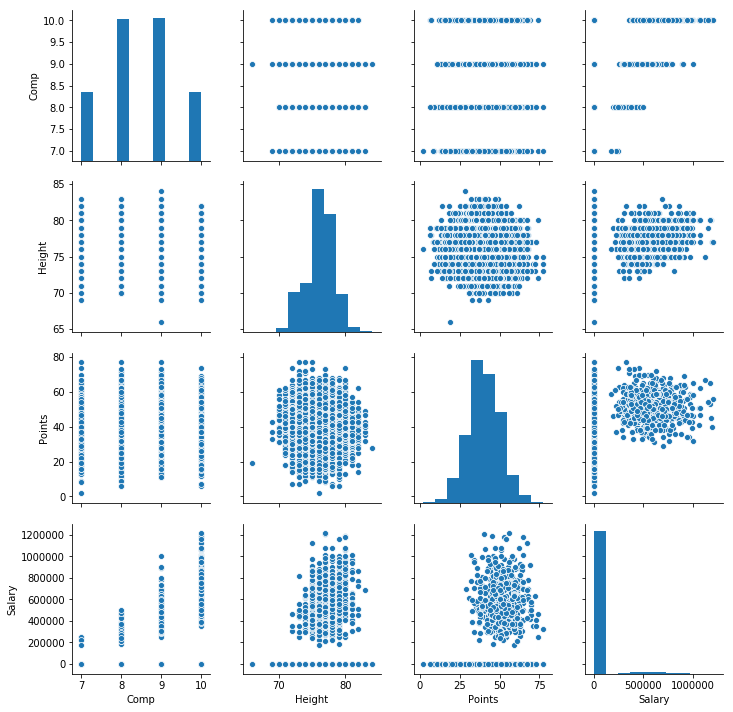

In [184]:
sns.pairplot(nba)

Salary, the output variable, has a highly concentrated range of values with several significant outliers. It also doesn't demonstrate a linear relationship with the dependent variables. It also has too many zeros regardless of the input variables, making linear regression a bad choice.

In [185]:
y = nba['Salary']
X = nba.drop('Salary', axis=1)

reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)

0.17713112376928278

In [186]:
y = []

for i in nba['Salary']:
    if i == 0:
        y.append(0)
    else:
        y.append(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

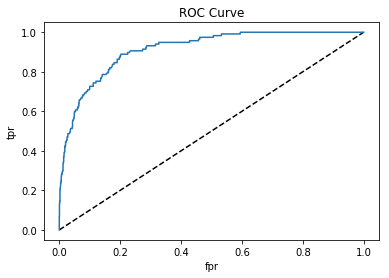

0.9133134523469095

In [187]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
probas = lr.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()

roc_auc_score(y_test, probas[:, 1])

In [188]:
mask = nba['Salary'] > 0
made_it = nba[mask]

In [189]:
made_it['Salary'] = np.log1p(made_it["Salary"])
made_it.head()

,Comp,Height,Points,Salary
9,9.0,78.0,63.0,13.114968
27,10.0,76.0,52.0,13.516115
30,8.0,78.0,62.0,12.585474
115,10.0,77.0,63.0,13.569880
117,8.0,76.0,50.0,12.465995


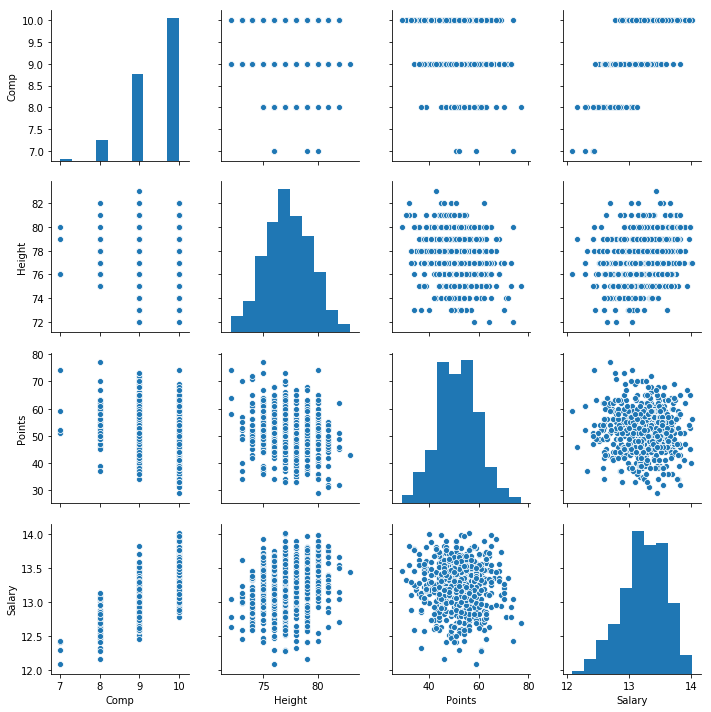

In [190]:
sns.pairplot(made_it)

In [191]:
y = made_it['Salary']
X = made_it.drop('Salary', axis=1)

reg = LinearRegression()
reg.fit(X, y)
reg.score(X, y)

0.6550892246363749

In [192]:
player = [9, 78, 46]
proba = lr.predict_proba([player])
proba

array([[0.93958104, 0.06041896]])

The player is predicted to not make the NBA from the logistic regression model... but we can try to see what his/her salary would have been if the model did predict that he/she makes the NBA.

In [193]:
pred = reg.predict([player])
np.expm1(pred)

array([457391.61473302])

Based on the regression using data points with a non-zero salary and pretending that the player is predicted to make the NBA, the player's salary is estimated to be $457,391.61